# ANN for make simulation and make prediction in physics

# import working liberary

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import RMSprop
from keras.models import load_model
import numpy as np

# global variables

In [263]:
# input variable to program
#inputFile = 'datasets/collect data_pi-modified.xlsx'
inputFile = 'All data mesons+baryons.xlsx'
inputSheetName = 'main'


# read data

In [264]:
""" from openpyxl import Workbook
import openpyxl """
# Read the data from the excel file
data_all = pd.read_excel(inputFile,sheet_name=inputSheetName)
#data =pd.DataFrame(data_all)     # data_all[data_all['Spectrum']<60]
temp_data_all = data_all[data_all['Spectrum']<60]
data =temp_data_all.reset_index(drop=True)

#data = data_all
#data = data[data['N part']==337]
# Split the data into input and output variables
X = data[['mass','s','N part','Pt']]
y = data['Spectrum'].to_frame('Spectrum')

print(X.head)
print(y.head)

<bound method NDFrame.head of         mass     s  N part     Pt
0     139.57   7.7     337  0.425
1     139.57   7.7     337  0.475
2     139.57   7.7     337  0.525
3     139.57   7.7     337  0.575
4     139.57   7.7     337  0.625
...      ...   ...     ...    ...
6445  938.27  39.0      14  1.550
6446  938.27  39.0      14  1.650
6447  938.27  39.0      14  1.750
6448  938.27  39.0      14  1.850
6449  938.27  39.0      14  1.950

[6450 rows x 4 columns]>
<bound method NDFrame.head of       Spectrum
0      46.3708
1      34.7823
2      26.3221
3      19.7093
4      15.0548
...        ...
6445    0.0073
6446    0.0049
6447    0.0034
6448    0.0023
6449    0.0016

[6450 rows x 1 columns]>


# normaliz input

In [265]:
# Normalize the input
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
# Create a RobustScaler object
scaler = RobustScaler()
#scaler = StandardScaler()
# Fit the scaler to the input data and transform it
X_normalized = scaler.fit_transform(X)
# Print the normalized input data
print('X_normalized')
print(X_normalized)
X_train = X_normalized
#X_train = X
print('X_train')
print(X_train) 


X_normalized
[[-0.4433542  -0.76774194  1.22702703 -0.40625   ]
 [-0.4433542  -0.76774194  1.22702703 -0.34375   ]
 [-0.4433542  -0.76774194  1.22702703 -0.28125   ]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.25      ]
 [ 0.5566458   1.2516129  -0.51891892  1.375     ]
 [ 0.5566458   1.2516129  -0.51891892  1.5       ]]
X_train
[[-0.4433542  -0.76774194  1.22702703 -0.40625   ]
 [-0.4433542  -0.76774194  1.22702703 -0.34375   ]
 [-0.4433542  -0.76774194  1.22702703 -0.28125   ]
 ...
 [ 0.5566458   1.2516129  -0.51891892  1.25      ]
 [ 0.5566458   1.2516129  -0.51891892  1.375     ]
 [ 0.5566458   1.2516129  -0.51891892  1.5       ]]


# loada saved model

In [266]:
# Load the saved model
modelName = 'good - all_hadrons_4_test-19-5-2023-8L-100-16.h5'
model = load_model(modelName)
#configure output parameters
outputFile = 'out_in4- '+modelName+' .xlsx'
summaryOutFile = modelName + ' - Summary .txt'
outputSheetName = 'predicat_in4-good -  '+modelName+' '
nameFigImg = 'fig_in4- '+modelName+' .png'

# define the model - compile - fit - save

In [267]:

''' Define the model '''
""" # Define the model
modelName = 'all-hadron-4in.h5'
model = Sequential(name=modelName)
# Add the first dense layer
model.add(Dense(40, input_dim=4, activation='relu'))

# Add batch normalization
#model.add(BatchNormalization())
model.add(Dense(40, activation='relu'))
#model.add(BatchNormalization())
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))

# Add the output layer
model.add(Dense(1))
# Add the output layer
#model.add(Dense(1, activation='softmax')) 

''' # compile the model      '''

# Compile the model with Levenberg-Marquardt optimizer
optimizer = RMSprop(learning_rate=0.001, rho=0.001,)
model.compile(loss='mean_squared_error', optimizer=optimizer)

''' train the model & save current compiled model  '''
# Train the model
#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)
model.fit(X_train, y, epochs=100, batch_size=16) 
# Save the model
model.save('modified-input-all_hadrons_4_test-19-5-2023-8L-100-16.h5')


 """

" # Define the model\nmodelName = 'all-hadron-4in.h5'\nmodel = Sequential(name=modelName)\n# Add the first dense layer\nmodel.add(Dense(40, input_dim=4, activation='relu'))\n\n# Add batch normalization\n#model.add(BatchNormalization())\nmodel.add(Dense(40, activation='relu'))\n#model.add(BatchNormalization())\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(80, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\nmodel.add(Dense(40, activation='relu'))\n\n# Add the output layer\nmodel.add(Dense(1))\n# Add the output layer\n#model.add(Dense(1, activation='softmax')) \n\n''' # compile the model      '''\n\n# Compile the model with Levenberg-Marquardt optimizer\noptimizer = RMSprop(learning_rate=0.001, rho=0.001,)\nmodel.compile(loss='mean_squared_error', optimizer=optimizer)\n\n''' train the model & save current compiled model  '''\n# Train the model\n#model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)\nmodel.fit(X_train, y, epochs=100, batch_size=16) \n# 

# Evaluate the model and make prediction 

In [268]:
from sklearn.metrics import mean_squared_error

# Make predictions on new data
X_test =pd.DataFrame(X_train) #scaler.transform(X)
#X_test = scaler.fit_transform(X)
print("new_data is : ")
print(X_test)
predictions = model.predict(X_test)
predictions = predictions.flatten()
predictions = pd.Series(predictions)
predictions = predictions.to_frame('predictions')
print("predictions is : ")
print(predictions)

# Evaluate the model
score = model.evaluate(X_test, y)
print("score " , score)
print(score)
mse = mean_squared_error(y,predictions)
print('mse' , mse)

#print("accuracy")
#print(accuracy)

new_data is : 
             0         1         2        3
0    -0.443354 -0.767742  1.227027 -0.40625
1    -0.443354 -0.767742  1.227027 -0.34375
2    -0.443354 -0.767742  1.227027 -0.28125
3    -0.443354 -0.767742  1.227027 -0.21875
4    -0.443354 -0.767742  1.227027 -0.15625
...        ...       ...       ...      ...
6445  0.556646  1.251613 -0.518919  1.00000
6446  0.556646  1.251613 -0.518919  1.12500
6447  0.556646  1.251613 -0.518919  1.25000
6448  0.556646  1.251613 -0.518919  1.37500
6449  0.556646  1.251613 -0.518919  1.50000

[6450 rows x 4 columns]
202/202 [==============================] - 0s 597us/step
predictions is : 
      predictions
0       50.695030
1       39.451057
2       30.011566
3       22.124079
4       16.366070
...           ...
6445    -0.013973
6446     0.001270
6447     0.020193
6448     0.020156
6449     0.009678

[6450 rows x 1 columns]
202/202 [==============================] - 0s 638us/step - loss: 2.2244
score  2.2243964672088623
2.2243964672088623

# draw 

shape of data (6450, 7)
shape of pred (6450, 1)
shape of datap (6450, 8)
data : 
         mass     s  N part     Pt  Spectrum     err1     err2
0     139.57   7.7     337  0.425   46.3708  0.11247  3.01883
1     139.57   7.7     337  0.475   34.7823  0.09267  2.24990
2     139.57   7.7     337  0.525   26.3221  0.07704  1.69598
3     139.57   7.7     337  0.575   19.7093  0.06396  1.26704
4     139.57   7.7     337  0.625   15.0548  0.05379  0.96702
...      ...   ...     ...    ...       ...      ...      ...
6445  938.27  39.0      14  1.550    0.0073  0.00008  0.00070
6446  938.27  39.0      14  1.650    0.0049  0.00007  0.00057
6447  938.27  39.0      14  1.750    0.0034  0.00005  0.00039
6448  938.27  39.0      14  1.850    0.0023  0.00004  0.00026
6449  938.27  39.0      14  1.950    0.0016  0.00003  0.00018

[6450 rows x 7 columns]
pred 
        predictions
0       50.695030
1       39.451057
2       30.011566
3       22.124079
4       16.366070
...           ...
6445    -0.0139

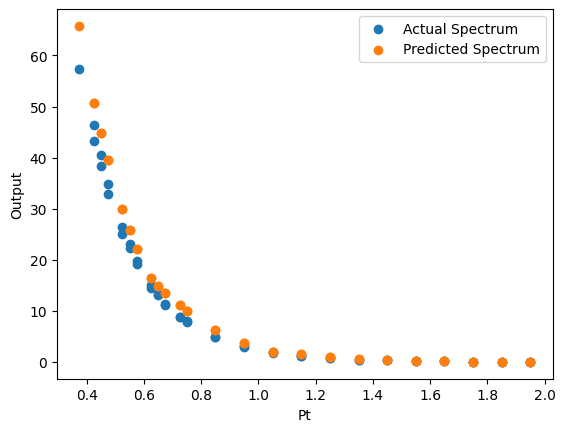

<Figure size 640x480 with 0 Axes>

In [269]:
# for drawing in 2d i choose Pt as x-axis
error = data['Spectrum'] - predictions['predictions']
error = error.to_frame('error')
print('shape of data' , data.shape)
print('shape of pred' , predictions.shape)
#datap = pd.concat([data,predictions],axis=1)
datap = pd.merge(data,predictions,left_index=True, right_index=True)
print('shape of datap',datap.shape)

print('data : \n',data)
print('pred \n ',predictions)
print('datap \n',datap)

# xap : data
xap = pd.DataFrame(datap)
# xapf : xap after filteration
xapf= pd.DataFrame(datap)
xapf = xapf[xapf['mass']==139.57]
xapf = xapf[xapf['s']==7.7]
xapf = xapf[xapf['N part']==337]

print ('xapf : \n',xapf)
print('datap shap : \n',datap.shape)
print ('xapf shap : \n',xapf.shape)
dataGraph1 = pd.merge(xapf['Pt'],xapf['predictions'],left_index=True, right_index=True)
print('datagraph1 : \n',dataGraph1)
dataGraph = pd.merge(dataGraph1,xapf['Spectrum'],left_index=True, right_index=True)
print('dataGraph : \n', dataGraph)

#dataGraph = pd.concat([xapf['Pt'],xapf['predictions'],xapf['Spectrum']],axis=1)
#print(dataGraph)
#print('shape of dataGraph',dataGraph.shape)
print('shape of dataGraph',dataGraph.shape)

# Plot the data and predictions

#plt.semilogy(xapf['Pt'], xapf['Spectrum']   ,'bo', label='Actual')
#plt.semilogy(xapf['Pt'], xapf['predictions'],'ro', label='Predicted')
""" plt.scatter(xapf['Pt'], xapf['Spectrum'])
plt.scatter(xapf['Pt'], xapf['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend(['Ac'])
plt.show()
plt.savefig(nameFigImg) """

plt.scatter(dataGraph['Pt'], dataGraph['Spectrum'])
plt.scatter(dataGraph['Pt'], dataGraph['predictions'])
plt.xlabel('Pt')
plt.ylabel('Output')
plt.legend(['Actual Spectrum', 'Predicted Spectrum'])
#plt.show()
plt.savefig(nameFigImg)
plt.show()

# write output to excel 

In [270]:

# Write predictions , data to Excel file
err1=data['err1'].to_frame('err1')
err2=data['err2'].to_frame('err2')
#SquareErrorForEachPoint = np.sqrt( ((datap['predictions']- datap['Spectrum'])/(err1- err2)))
SquareErrorForEachPoint =np.square( (datap['predictions']- datap['Spectrum'])/(err1['err1']+ err2['err2']))

SquareErrorForEachPoint = pd.Series(SquareErrorForEachPoint)
SquareErrorForEachPoint = SquareErrorForEachPoint.to_frame('SquareErrorForEachPoint')
print('Square error for each point : ',SquareErrorForEachPoint)

outputpredicat = pd.concat([datap, SquareErrorForEachPoint], axis=1)
#pd.DataFrame([datap,SquareErrorForEachPoint])
# Calculate the RMSE.
#rmse = mean_squared_error(outputpredicat['Spectrum'], outputpredicat['predictions'])
mysum =outputpredicat['SquareErrorForEachPoint'].sum()
mycount =(outputpredicat['SquareErrorForEachPoint'].count()) -1
rmse = np.sqrt(mysum/mycount)

#rmse = np.sqrt (np.average(outputpredicat['SquareErrorForEachPoint']))
rmse = pd.Series(rmse)
#rmse = pd.DataFrame({'rmse': rmse})
print('RMSE',rmse)

# output is data frame
#print(outputpredicat.head(10))
# Write the DataFrames to an Excel file with three sheets
with pd.ExcelWriter(outputFile) as writer:
    outputpredicat.to_excel(writer, sheet_name=outputSheetName, index=False)
    rmse.to_excel(writer, sheet_name='RMSE', index=False)


Square error for each point :        SquareErrorForEachPoint
0                    1.907077
1                    3.972075
2                    4.330119
3                    3.291536
4                    1.650039
...                       ...
6445               743.786695
6446                32.177498
6447              1456.613892
6448              3542.501723
6449              1479.558421

[6450 rows x 1 columns]
RMSE 0    106.295022
dtype: float64


d:\Repos\ReposEda\DrSamahPrjs\ANN\ANN\.venv\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


# print model summery 

In [271]:

print("End")
#print("accuracy :" + str(accuracy))
print("score " + str(score))
SummaryOut = model.summary()
print(SummaryOut)

from io import StringIO
# summarize the model
with StringIO() as buf:
    model.summary(print_fn=lambda x: buf.write(x + '\n'))
    summary = buf.getvalue()

with open(modelName +'-summary.txt', 'w') as f:
    f.write(summary)


End
score 2.2243964672088623
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 40)                200       
                                                                 
 dense_39 (Dense)            (None, 40)                1640      
                                                                 
 dense_40 (Dense)            (None, 80)                3280      
                                                                 
 dense_41 (Dense)            (None, 80)                6480      
                                                                 
 dense_42 (Dense)            (None, 40)                3240      
                                                                 
 dense_43 (Dense)            (None, 40)                1640      
                                                                 
 dense_44 (Dense)        